<a href="https://colab.research.google.com/github/deltorobarba/astrophysics/blob/main/encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Encoding (Embedding)**

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_0000.png)


https://www.mdpi.com/2227-7390/12/21/3318: Quantum Machine Learning: Exploring the Role of Data Encoding Techniques, Challenges, and Future Directions

https://arxiv.org/abs/2411.02087v2 An Exponential Separation Between Quantum and Quantum-Inspired Classical Algorithms for Machine Learning

https://pennylane.ai/qml/glossary/quantum_embedding

In [ ]:
!pip install pennylane cirq qutip -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 34.2 MB/s eta 0:00:00


In [ ]:
# Dense Angle Encoding
def dense_angle_encode(data_vector):
    n_qubits = len(data_vector) // 2  # Each qubit encodes 2 values
    qubits = [cirq.GridQubit(0, i) for i in range(n_qubits)]
    circuit = cirq.Circuit()

    # Encode pairs of values using Ry and Rz rotations
    for i, qubit in enumerate(qubits):
        # Ry rotation for first value
        circuit.append(cirq.ry(data_vector[2*i])(qubit))
        # Rz rotation for second value
        circuit.append(cirq.rz(data_vector[2*i + 1])(qubit))

    # Add measurements
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit

**Basis State Encoding**

$| \psi \rangle = \alpha |x_1\rangle \otimes \beta |x_2\rangle \otimes \ldots \gamma |x_n\rangle$

In [ ]:
# PennyLane Example
import pennylane as qml
import numpy as np

# Create a device with 4 qubits
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def basis_state_encoding(binary_input):
    """
    Encode a classical 4-bit binary number into quantum basis states
    Args:
        binary_input (list): List of 4 binary digits (0 or 1)
    Returns:
        array: Quantum state measurements
    """
    # Initialize qubits in |0⟩ state by default

    # Apply X gates where binary_input is 1 to flip from |0⟩ to |1⟩
    for wire, bit in enumerate(binary_input):
        if bit == 1:
            qml.PauliX(wires=wire)

    # Return measurements in computational basis
    return qml.probs(wires=range(4))

# Example usage for PennyLane
classical_number = [1, 0, 1, 0]  # Encoding binary 1010 (decimal 10)
result = basis_state_encoding(classical_number)
print(f"PennyLane encoded state probabilities for {classical_number}: {result}\n")

PennyLane encoded state probabilities for [1, 0, 1, 0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]



In [ ]:
# Cirq Example
import cirq

def create_basis_state_circuit(binary_input):
    """
    Create a Cirq circuit that encodes a classical 4-bit binary number
    Args:
        binary_input (list): List of 4 binary digits (0 or 1)
    Returns:
        Circuit: Cirq circuit with encoded basis states
    """
    # Create qubits
    qubits = [cirq.GridQubit(0, i) for i in range(4)]
    circuit = cirq.Circuit()

    # Apply X gates where binary_input is 1
    for qubit, bit in zip(qubits, binary_input):
        if bit == 1:
            circuit.append(cirq.X(qubit))

    # Add measurements
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit

# Example usage for Cirq
simulator = cirq.Simulator()
circuit = create_basis_state_circuit([1, 0, 1, 0])
result = simulator.run(circuit, repetitions=1)
print(f"Circuit:\n{circuit}")
print(f"\nCirq measurement results:\n{result}")

Circuit:
(0, 0): ───X───M('result')───
               │
(0, 1): ───────M─────────────
               │
(0, 2): ───X───M─────────────
               │
(0, 3): ───────M─────────────

Cirq measurement results:
result=1, 0, 1, 0


**Single-Qubit Angle Encoding**

$|\psi(x)\rangle = R(x) |0\rangle $

In [ ]:
import cirq
import numpy as np

def single_qubit_angle_encode(data_point, rotation='x'):
    """
    Encode a single classical value into a qubit's rotation
    Args:
        data_point (float): Value to encode (should be normalized between 0 and 2π)
        rotation (str): Rotation axis ('x', 'y', or 'z')
    Returns:
        Circuit: Cirq circuit with encoded angle
    """
    # Create circuit with single qubit
    qubit = cirq.GridQubit(0, 0)
    circuit = cirq.Circuit()

    # Choose rotation based on axis
    if rotation == 'x':
        circuit.append(cirq.rx(data_point)(qubit))
    elif rotation == 'y':
        circuit.append(cirq.ry(data_point)(qubit))
    else:  # z rotation
        circuit.append(cirq.rz(data_point)(qubit))

    # Add measurement
    circuit.append(cirq.measure(qubit, key='result'))
    return circuit

# Example usage
data = np.pi/4  # Example value to encode
circuit = single_qubit_angle_encode(data, rotation='y')
print(f"Circuit for encoding {data:.3f} radians:")
print(circuit)

# Simulate results
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=100)
print("\nMeasurement results:")
print(result.histogram(key='result'))

Circuit for encoding 0.785 radians:
(0, 0): ───Ry(0.25π)───M('result')───

Measurement results:
Counter({0: 91, 1: 9})



Circuit for 0.785 radians Y-rotation:
(0, 0): ───Ry(0.25π)───
Final state vector: [0.9238795 +0.j 0.38268343+0.j]

Circuit for 1.571 radians Y-rotation:
(0, 0): ───Ry(0.5π)───
Final state vector: [0.70710677+0.j 0.70710677+0.j]

Circuit for 2.356 radians Y-rotation:
(0, 0): ───Ry(0.75π)───
Final state vector: [0.38268343+0.j 0.9238795 +0.j]


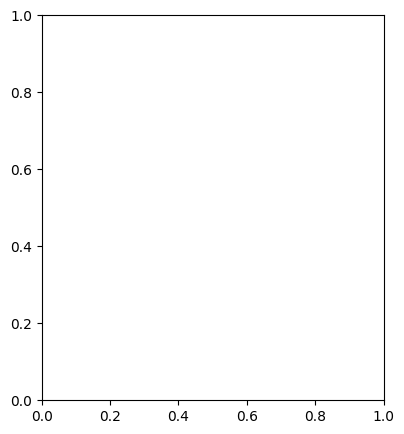

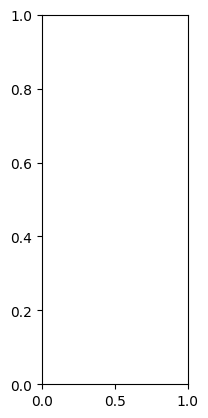

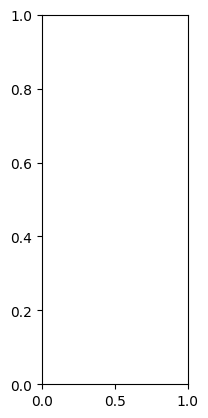

In [ ]:
import cirq
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt

def single_qubit_angle_encode(data_point, rotation='x'):
    """
    Encode a single classical value into a qubit's rotation
    Args:
        data_point (float): Value to encode (should be normalized between 0 and 2π)
        rotation (str): Rotation axis ('x', 'y', or 'z')
    Returns:
        Circuit: Cirq circuit with encoded angle
        final_state: Final state vector after encoding
    """
    # Create circuit with single qubit
    qubit = cirq.GridQubit(0, 0)
    circuit = cirq.Circuit()

    # Choose rotation based on axis
    if rotation == 'x':
        circuit.append(cirq.rx(data_point)(qubit))
    elif rotation == 'y':
        circuit.append(cirq.ry(data_point)(qubit))
    else:  # z rotation
        circuit.append(cirq.rz(data_point)(qubit))

    # Simulate to get state vector
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    final_state = result.final_state_vector

    return circuit, final_state

def plot_bloch_sphere(state_vector, title="Bloch Sphere Representation"):
    """
    Visualize a single-qubit state on the Bloch sphere
    Args:
        state_vector: Complex numpy array representing quantum state
        title: Title for the plot
    """
    # Create a new figure
    plt.figure(figsize=(8, 8))

    # Create Bloch sphere
    b = qt.Bloch()

    # Convert state vector to Qutip state
    psi = qt.Qobj(state_vector)

    # Add state to Bloch sphere
    b.add_states(psi)
    b.add_states(psi, 'point')

    # Customize appearance
    b.sphere_alpha = 0.1
    b.vector_color = ['r']
    b.point_color = ['b']

    # Add title
    plt.title(title)

    # Render Bloch sphere
    b.render()
    plt.close()

    return b

# Example usage
angles = [np.pi/4, np.pi/2, 3*np.pi/4]

# Plot for different angles with Y-rotation
for angle in angles:
    circuit, state = single_qubit_angle_encode(angle, rotation='y')
    print(f"\nCircuit for {angle:.3f} radians Y-rotation:")
    print(circuit)
    print(f"Final state vector: {state}")

    # Visualize on Bloch sphere
    b = plot_bloch_sphere(state, f"Y-rotation by {angle:.3f} radians")
    plt.show()

# Compare different rotation axes
angle = np.pi/3
rotations = ['x', 'y', 'z']

plt.figure(figsize=(15, 5))
for i, rotation in enumerate(rotations, 1):
    plt.subplot(1, 3, i)
    circuit, state = single_qubit_angle_encode(angle, rotation=rotation)
    b = plot_bloch_sphere(state, f"{rotation.upper()}-rotation by {angle:.3f} radians")
    plt.show()

**Multi-Qubit Angle Encoding**

$|\psi(x_1, x_2, \ldots , x_n)\rangle = R_1(x_1) \otimes R_2(x_2) \otimes \ldots \otimes R_n(x_n) |0\rangle \otimes n$

In [ ]:
import cirq
import numpy as np

def multi_qubit_angle_encode(data_vector):
    """
    Encode multiple classical values into multiple qubits using rotation gates
    Args:
        data_vector (list): List of values to encode (should be normalized between 0 and 2π)
    Returns:
        Circuit: Cirq circuit with encoded angles
    """
    # Create qubits for each data point
    qubits = [cirq.GridQubit(0, i) for i in range(len(data_vector))]
    circuit = cirq.Circuit()

    # Encode each value using Ry rotation
    for qubit, value in zip(qubits, data_vector):
        circuit.append(cirq.ry(value)(qubit))

    # Add measurements
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit

# Example usage
data = [np.pi/4, np.pi/3, np.pi/2]  # Example values to encode
circuit = multi_qubit_angle_encode(data)
print(f"Circuit for encoding {data}:")
print(circuit)

# Simulate results
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=100)
print("\nMeasurement results:")
print(result.histogram(key='result'))

Circuit for encoding [0.7853981633974483, 1.0471975511965976, 1.5707963267948966]:
(0, 0): ───Ry(0.25π)────M('result')───
                        │
(0, 1): ───Ry(0.333π)───M─────────────
                        │
(0, 2): ───Ry(0.5π)─────M─────────────

Measurement results:
Counter({1: 30, 0: 30, 2: 16, 3: 10, 4: 5, 7: 4, 5: 3, 6: 2})


**Dense Angle Encoding**

$|\psi(x_1, x_2, \ldots , x_n)\rangle = R_1(x_1) P_1(x_2) \otimes R_2(x_3) P_2(x_4) \otimes \ldots \otimes R_n(x_{2n-1}) P_n(x_{2n}) |0\rangle \otimes n$

In [ ]:
import cirq
import numpy as np

def dense_angle_encode(data_vector):
    """
    Dense angle encoding using both Ry and Rz rotations on each qubit
    Args:
        data_vector (list): List of values to encode (length should be 2*n_qubits)
    Returns:
        Circuit: Cirq circuit with densely encoded angles
    """
    n_qubits = len(data_vector) // 2  # Each qubit encodes 2 values
    qubits = [cirq.GridQubit(0, i) for i in range(n_qubits)]
    circuit = cirq.Circuit()

    # Encode pairs of values using Ry and Rz rotations
    for i, qubit in enumerate(qubits):
        # Ry rotation for first value
        circuit.append(cirq.ry(data_vector[2*i])(qubit))
        # Rz rotation for second value
        circuit.append(cirq.rz(data_vector[2*i + 1])(qubit))

    # Add measurements
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit

# Example usage
data = [np.pi/4, np.pi/3, np.pi/2, np.pi/6]  # 4 values to encode into 2 qubits
circuit = dense_angle_encode(data)
print(f"Circuit for encoding {data}:")
print(circuit)

# Simulate results
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=100)
print("\nMeasurement results:")
print(result.histogram(key='result'))

Circuit for encoding [0.7853981633974483, 1.0471975511965976, 1.5707963267948966, 0.5235987755982988]:
(0, 0): ───Ry(0.25π)───Rz(0.333π)───M('result')───
                                    │
(0, 1): ───Ry(0.5π)────Rz(0.167π)───M─────────────

Measurement results:
Counter({1: 44, 0: 41, 3: 9, 2: 6})


**Amplitude Encoding**

$|\psi(x)\rangle =  x_1 |0\rangle + x_2 |1\rangle + ... + x_N |N-1\rangle = \sum_{i=0}^{N-1} x_i |i\rangle $

In [ ]:
import cirq
import numpy as np
from scipy.linalg import logm, expm

def amplitude_encode(normalized_vector):
    """
    Encode classical data into quantum amplitudes
    Args:
        normalized_vector (list): Normalized vector to encode (length must be power of 2)
    Returns:
        Circuit: Cirq circuit that prepares the state with given amplitudes
    """
    # Check if length is power of 2
    n_qubits = int(np.log2(len(normalized_vector)))
    if 2**n_qubits != len(normalized_vector):
        raise ValueError("Input vector length must be power of 2")

    # Create qubits
    qubits = [cirq.GridQubit(0, i) for i in range(n_qubits)]
    circuit = cirq.Circuit()

    # Create state preparation unitary
    # This is a simplified version that works for some cases
    # A full implementation would use quantum state preparation algorithms
    # like the Quantum Random Access Memory (QRAM) or Möttönen method

    def create_state_preparation():
        # Initialize in |0...0⟩ state
        initial_state = np.zeros(2**n_qubits)
        initial_state[0] = 1

        # Calculate required unitary
        target_state = np.array(normalized_vector)
        initial_state = initial_state.reshape(-1, 1)
        target_state = target_state.reshape(-1, 1)

        # Using a simple rotation approach
        cos_theta = np.abs(initial_state.T @ target_state)[0, 0]
        theta = np.arccos(cos_theta)

        if np.abs(theta) < 1e-10:
            return []

        axis = np.cross(initial_state.T, target_state.T)[0]
        axis = axis / np.linalg.norm(axis)

        generator = np.zeros((2**n_qubits, 2**n_qubits))
        for i in range(2**n_qubits):
            for j in range(2**n_qubits):
                if i != j:
                    generator[i, j] = theta * axis[j]
                    generator[j, i] = -theta * axis[j]

        unitary = expm(generator)
        return unitary

    # Try to decompose the unitary into gates (simplified approach)
    try:
        unitary = create_state_preparation()
        circuit.append(cirq.MatrixGate(unitary).on(*qubits))
    except:
        print("Warning: Could not create exact encoding. Using approximate approach.")
        # Add some basic rotations as approximation
        for i, amplitude in enumerate(normalized_vector):
            if amplitude != 0:
                angle = 2 * np.arccos(np.abs(amplitude))
                circuit.append(cirq.ry(angle)(qubits[0]))

    # Add measurements
    circuit.append(cirq.measure(*qubits, key='result'))
    return circuit

# Example usage
# Create normalized vector (must sum to 1)
data = [0.5, 0.5, 0.5, 0.5]  # Example normalized vector for 2 qubits
normalized_data = np.array(data) / np.linalg.norm(data)

circuit = amplitude_encode(normalized_data)
print(f"Circuit for encoding {normalized_data}:")
print(circuit)

# Simulate results
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=100)
print("\nMeasurement results:")
print(result.histogram(key='result'))

# Optional: Check state vector
final_state = simulator.simulate(circuit).final_state_vector
print("\nFinal state vector:")
print(final_state)

Circuit for encoding [0.5 0.5 0.5 0.5]:
(0, 0): ───Ry(0.667π)───Ry(0.667π)───Ry(0.667π)───Ry(0.667π)───M('result')───
                                                               │
(0, 1): ───────────────────────────────────────────────────────M─────────────

Measurement results:
Counter({2: 71, 0: 29})

Final state vector:
[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]


##### <font color="blue">*Applications*

###### *Quantum Biology*

* Research has already shown that quantum phenomena like coherence and tunneling are active in biological processes, from photosynthesis to enzyme activity. The framework hypothesizes that similar quantum effects might be at work in mycorrhizal nutrient transfer, especially in the transport of nutrients such as phosphorus and nitrogen.
* Quantum tunneling, for example, could enable particles like protons to cross energy barriers within fungal membranes more efficiently than classical mechanics would allow. Meanwhile, coherence may optimize the transfer of electrons during redox reactions to facilitate nutrient uptake. The study notes that these mechanisms could explain why mycorrhizal fungi are able to maintain efficient nutrient exchange even under environmental stress.
* https://thequantuminsider.com/2024/10/25/mushroom-mechanics-mycoponics-and-qml-model-fungal-network-for-sustainable-agriculture/

Video Course: [PHY361 Quantum Mechanics:
Spin And Discrete Systems](https://youtube.com/playlist?list=PLIKpuUo6d5pLdaGlx355xdH_RCZXRuWLK&si=2U2Uixe14tr1hIMm)